# Visão Computacional e Deep Learning para Sensoriamento Remoto com Python


# Capítulo 15 - Segmentação de Áreas de Eucalipto no Leste de Mato Grosso do Sul

Neste exemplo vamos criar um modelo para segmentar áreas de eucalipto em imagens do Sentinel 2. Para isso selecionamos algumas áreas onde foram coletadas os poligonos de área de eucalipto. Esse poligono foi convertido em uma imagem máscara que será usada junta com a imagem do sentinel 2 para treinarmos o modelo.

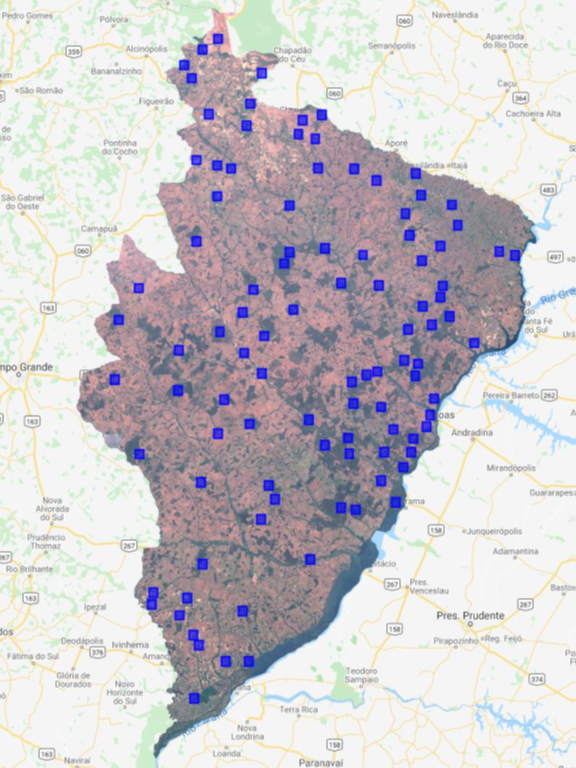

Foram selecionadas 10 bandas do sentinel 2: B02, B03, B04, B05, B06, B07, B08, B08A, B11 e B12. Também foram selecionadas imagens de 3 períodos do ano diferentes.

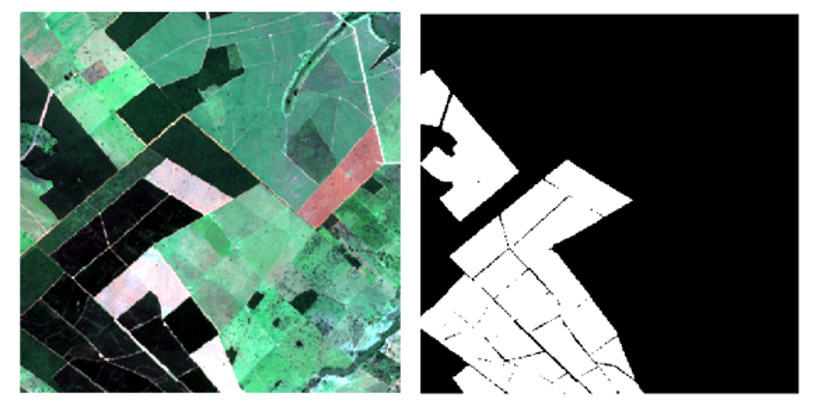

O dataset já está preparado, então começamos instalando o rasterio e importando algumas bibliotecas:

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 2.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import rasterio
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from rasterio.merge import merge
from rasterio.windows import Window

Definimos os caminhos para as imagens e mascaras das três diferentes épocas do ano:

In [ ]:
path_img_dry = 'drive/My Drive/Datasets/ForestryView/data/2019_dry_img'
path_img_wet = 'drive/My Drive/Datasets/ForestryView/data/2019_wet_img'
path_mask_dry = 'drive/My Drive/Datasets/ForestryView/data/2019_dry_tgt'
path_mask_wet = 'drive/My Drive/Datasets/ForestryView/data/2019_wet_tgt'
path_img_int = 'drive/My Drive/Datasets/ForestryView/data/2019_int_img'
path_mask_int = 'drive/My Drive/Datasets/ForestryView/data/2019_int_tgt'

In [ ]:
X_wet = []
images_files_wet = [f for f in os.listdir(path_img_wet)]
for i in range(len(images_files_wet)):
  import_raster = os.path.join(path_img_wet,'img_' + str(i+1) + '.tif')
  print(i)
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  im = np.nan_to_num(im)
  im = im[:,:,0:10]
  full_img = im.copy()
  print(full_img.shape)
  if (full_img.shape[0] == 335):
    full_img = full_img[1:,:,:]
  if (full_img.shape[1] == 335):
    full_img = full_img[:,1:,:]
  full_img = full_img[7:-7,7:-7,:]
  X_wet.append(full_img)
X_wet = np.array(X_wet)
print(X_wet.shape)



Y_wet = []
mask_files_wet = [f for f in os.listdir(path_mask_wet)]
for i in range(len(mask_files_wet)):
  import_raster = os.path.join(path_mask_wet,'tgt_' + str(i+1) + '.tif')
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  print(im.shape)
  if (im.shape[0] == 335):
    im = im[1:,:,:]
  if (im.shape[1] == 335):
    im = im[:,1:,:]
  im = im[7:-7,7:-7,:]
  Y_wet.append(im)
Y_wet = np.array(Y_wet)
print(Y_wet.shape)

0
(335, 335, 10)
1
(335, 335, 10)
2
(335, 335, 10)
3
(335, 334, 10)
4
(335, 335, 10)
5
(335, 335, 10)
6
(335, 335, 10)
7
(335, 335, 10)
8
(335, 335, 10)
9
(335, 335, 10)
10
(335, 335, 10)
11
(335, 335, 10)
12
(335, 335, 10)
13
(335, 335, 10)
14
(335, 335, 10)
15
(335, 335, 10)
16
(335, 335, 10)
17
(335, 335, 10)
18
(335, 335, 10)
19
(335, 335, 10)
20
(335, 335, 10)
21
(335, 335, 10)
22
(335, 335, 10)
23
(335, 335, 10)
24
(335, 335, 10)
25
(335, 335, 10)
26
(335, 335, 10)
27
(335, 335, 10)
28
(335, 335, 10)
29
(335, 335, 10)
30
(335, 335, 10)
31
(335, 335, 10)
32
(335, 335, 10)
33
(335, 335, 10)
34
(335, 335, 10)
35
(335, 335, 10)
36
(335, 335, 10)
37
(335, 335, 10)
38
(335, 335, 10)
39
(335, 335, 10)
40
(335, 335, 10)
41
(335, 335, 10)
42
(335, 335, 10)
43
(335, 335, 10)
44
(335, 335, 10)
45
(335, 335, 10)
46
(335, 335, 10)
47
(335, 335, 10)
48
(335, 335, 10)
49
(335, 335, 10)
50
(335, 335, 10)
51
(335, 335, 10)
52
(335, 335, 10)
53
(335, 335, 10)
54
(335, 335, 10)
55
(335, 335, 10)
56

In [ ]:
X_dry = []
images_files_dry = [f for f in os.listdir(path_img_dry)]
for i in range(len(images_files_dry)):
  import_raster = os.path.join(path_img_dry,'img_' + str(i+1) + '.tif')
  print(i)
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  im = np.nan_to_num(im)
  im = im[:,:,0:10]
  full_img = im.copy()
  print(full_img.shape)
  if (full_img.shape[0] == 335):
    full_img = full_img[1:,:,:]
  if (full_img.shape[1] == 335):
    full_img = full_img[:,1:,:]
  full_img = full_img[7:-7,7:-7,:]
  X_dry.append(full_img)
X_dry = np.array(X_dry)
print(X_dry.shape)



Y_dry = []
mask_files_dry = [f for f in os.listdir(path_mask_dry)]
for i in range(len(mask_files_dry)):
  import_raster = os.path.join(path_mask_dry,'tgt_' + str(i+1) + '.tif')
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  print(im.shape)
  if (im.shape[0] == 335):
    im = im[1:,:,:]
  if (im.shape[1] == 335):
    im = im[:,1:,:]
  im = im[7:-7,7:-7,:]
  Y_dry.append(im)
Y_dry = np.array(Y_dry)
print(Y_dry.shape)

0
(335, 335, 10)
1
(335, 335, 10)
2
(335, 335, 10)
3
(335, 334, 10)
4
(335, 335, 10)
5
(335, 335, 10)
6
(335, 335, 10)
7
(335, 335, 10)
8
(335, 335, 10)
9
(335, 335, 10)
10
(335, 335, 10)
11
(335, 335, 10)
12
(335, 335, 10)
13
(335, 335, 10)
14
(335, 335, 10)
15
(335, 335, 10)
16
(335, 335, 10)
17
(335, 335, 10)
18
(335, 335, 10)
19
(335, 335, 10)
20
(335, 335, 10)
21
(335, 335, 10)
22
(335, 335, 10)
23
(335, 335, 10)
24
(335, 335, 10)
25
(335, 335, 10)
26
(335, 335, 10)
27
(335, 335, 10)
28
(335, 335, 10)
29
(335, 335, 10)
30
(335, 335, 10)
31
(335, 335, 10)
32
(335, 335, 10)
33
(335, 335, 10)
34
(335, 335, 10)
35
(335, 335, 10)
36
(335, 335, 10)
37
(335, 335, 10)
38
(335, 335, 10)
39
(335, 335, 10)
40
(335, 335, 10)
41
(335, 335, 10)
42
(335, 335, 10)
43
(335, 335, 10)
44
(335, 335, 10)
45
(335, 335, 10)
46
(335, 335, 10)
47
(335, 335, 10)
48
(335, 335, 10)
49
(335, 335, 10)
50
(335, 335, 10)
51
(335, 335, 10)
52
(335, 335, 10)
53
(335, 335, 10)
54
(335, 335, 10)
55
(335, 335, 10)
56

In [ ]:
X_int = []
images_files_int = [f for f in os.listdir(path_img_int)]
for i in range(len(images_files_int)):
  import_raster = os.path.join(path_img_int,'img_' + str(i+1) + '.tif')
  print(i)
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  im = np.nan_to_num(im)
  im = im[:,:,0:10]
  full_img = im.copy()
  print(full_img.shape)
  if (full_img.shape[0] == 335):
    full_img = full_img[1:,:,:]
  if (full_img.shape[1] == 335):
    full_img = full_img[:,1:,:]
  full_img = full_img[7:-7,7:-7,:]
  X_int.append(full_img)
X_int = np.array(X_int)
print(X_int.shape)



Y_int = []
mask_files_int = [f for f in os.listdir(path_mask_int)]
for i in range(len(mask_files_int)):
  import_raster = os.path.join(path_mask_int,'tgt_' + str(i+1) + '.tif')
  with rasterio.open(import_raster) as src:
    im = src.read()
  im = im.transpose([1,2,0])
  print(im.shape)
  if (im.shape[0] == 335):
    im = im[1:,:,:]
  if (im.shape[1] == 335):
    im = im[:,1:,:]
  im = im[7:-7,7:-7,:]
  Y_int.append(im)
Y_int = np.array(Y_int)
print(Y_int.shape)

0
(335, 335, 10)
1
(335, 335, 10)
2
(335, 335, 10)
3
(335, 334, 10)
4
(335, 335, 10)
5
(335, 335, 10)
6
(335, 335, 10)
7
(335, 335, 10)
8
(335, 335, 10)
9
(335, 335, 10)
10
(335, 335, 10)
11
(335, 335, 10)
12
(335, 335, 10)
13
(335, 335, 10)
14
(335, 335, 10)
15
(335, 335, 10)
16
(335, 335, 10)
17
(335, 335, 10)
18
(335, 335, 10)
19
(335, 335, 10)
20
(335, 335, 10)
21
(335, 335, 10)
22
(335, 335, 10)
23
(335, 335, 10)
24
(335, 335, 10)
25
(335, 335, 10)
26
(335, 335, 10)
27
(335, 335, 10)
28
(335, 335, 10)
29
(335, 335, 10)
30
(335, 335, 10)
31
(335, 335, 10)
32
(335, 335, 10)
33
(335, 335, 10)
34
(335, 335, 10)
35
(335, 335, 10)
36
(335, 335, 10)
37
(335, 335, 10)
38
(335, 335, 10)
39
(335, 335, 10)
40
(335, 335, 10)
41
(335, 335, 10)
42
(335, 335, 10)
43
(335, 335, 10)
44
(335, 335, 10)
45
(335, 335, 10)
46
(335, 335, 10)
47
(335, 335, 10)
48
(335, 335, 10)
49
(335, 335, 10)
50
(335, 335, 10)
51
(335, 335, 10)
52
(335, 335, 10)
53
(335, 335, 10)
54
(335, 335, 10)
55
(335, 335, 10)
56

Após importar os dados separamos uma parte para treinar e uma parte para testar. E assim concatenamos em uma variável para as imagens de treino, outra para teste. Fazemos isso para as mascaras também.

In [ ]:
X_wet_train = X_wet[0:90,:,:,:].copy()
Y_wet_train = Y_wet[0:90,:,:,:].copy()
X_dry_train = X_dry[0:90,:,:,:].copy()
Y_dry_train = Y_dry[0:90,:,:,:].copy()
X_int_train = X_int[0:90,:,:,:].copy()
Y_int_train = Y_int[0:90,:,:,:].copy()


X_wet_test = X_wet[90:109,:,:,:].copy()
Y_wet_test = Y_wet[90:109,:,:,:].copy()
X_dry_test = X_dry[90:109,:,:,:].copy()
Y_dry_test = Y_dry[90:109,:,:,:].copy()
X_int_test = X_int[90:109,:,:,:].copy()
Y_int_test = Y_int[90:109,:,:,:].copy()



x_train = np.concatenate((X_wet_train,X_dry_train,X_int_train))
y_train = np.concatenate((Y_wet_train,Y_dry_train,Y_int_train))
x_test = np.concatenate((X_wet_test,X_dry_test,X_int_test))
y_test = np.concatenate((Y_wet_test,Y_dry_test,Y_int_test))

In [ ]:
del X_wet, X_dry, X_int, Y_wet, Y_dry, Y_int

In [ ]:
print(np.unique(y_test, return_counts=True))
print(np.unique(y_train, return_counts=True))

(array([0., 1.], dtype=float32), array([4356074, 1480726]))
(array([0., 1.], dtype=float32), array([21748725,  5899275]))


In [ ]:
x_test.shape

(57, 320, 320, 10)

In [ ]:
y_test.shape

(57, 320, 320, 1)

Vamos Agora plotar um exemplo em RGB:

In [ ]:
R = x_test[8,:,:,2]*4
G = x_test[8,:,:,1]*4
B = x_test[8,:,:,0]*4

rgb = np.dstack((R,G,B))
plt.figure(figsize=[12,12])
plt.imshow(rgb)
plt.axis('off')

(-0.5, 319.5, 319.5, -0.5)

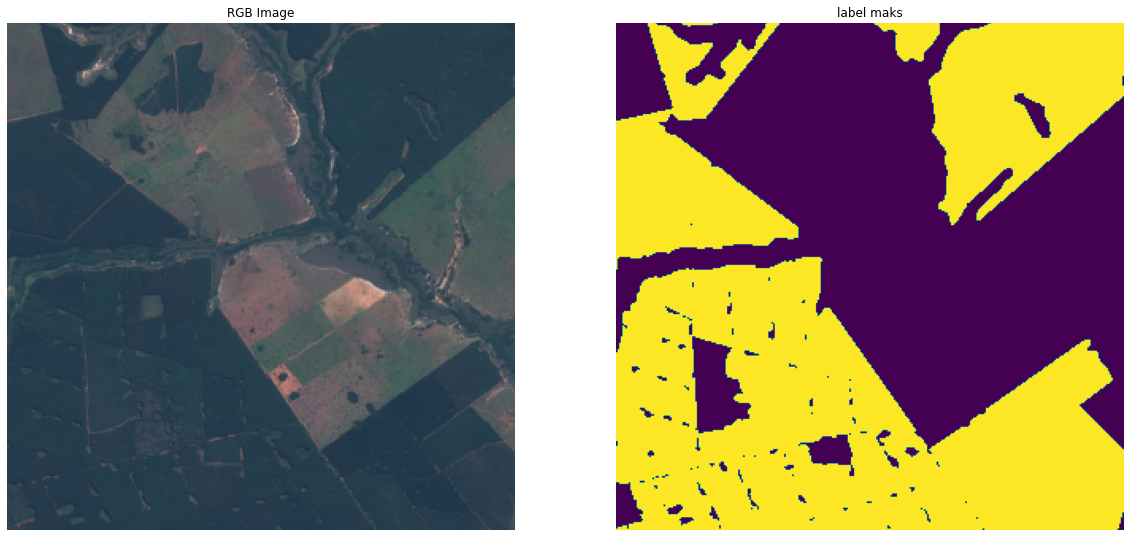

In [ ]:
i = 1
R = x_test[i,:,:,2]*4
G = x_test[i,:,:,1]*4
B = x_test[i,:,:,0]*4
rgb = np.dstack((R,G,B))
plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(rgb)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(y_test[i,:,:,0])
plt.title('label maks')
plt.axis('off')

O próximo passo é importar as funções do Keras, implemetar o aumento de dados no dataset de treinamento, construir a arquitetura e iniciar o treinamento:

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Concatenate, add, Conv2DTranspose, BatchNormalization, Dropout, Activation, Add, AveragePooling2D, Lambda, SeparableConv2D, GlobalAveragePooling2D, DepthwiseConv2D, ZeroPadding2D, LeakyReLU
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from keras.activations import relu
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
from keras import backend as K
import tensorflow as tf
from keras.models import load_model

In [ ]:
def jaccard_coef(y_true, y_pred,smooth=100):
  # __author__ = Vladimir Iglovikov
  intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
  sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

  jac = (intersection + smooth) / (sum_ - intersection + smooth)

  return K.mean(jac)

In [ ]:
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)


def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_coef_loss(y_true, y_pred)

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True,
    zoom_range = 0.2)

mask_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True,
    zoom_range = 0.2)

In [ ]:
img_datagen.fit(x_train, augment=True,seed=1200)
mask_datagen.fit(y_train, augment=True,seed=1200)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (270, 320, 320, 10) (10 channels).
  ' channels).')


In [ ]:
X=img_datagen.flow(x_train,batch_size=8,seed=1200)
Y=mask_datagen.flow(y_train,batch_size=8,seed=1200)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (270, 320, 320, 10) (10 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [ ]:
train_generator = zip(X, Y)

In [ ]:
steps_per_epoch = len(x_train)//8
validation_steps = len(x_test)//8

In [ ]:
def conv_block(input_tensor, filters, strides, d_rates):
    x = Conv2D(filters[0], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[0])(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[1], kernel_size=3, strides=strides, kernel_initializer='he_uniform', padding='same', dilation_rate=d_rates[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[2])(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)

    return x


def identity_block(input_tensor, filters, d_rates):
    x = Conv2D(filters[0], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[0])(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[1], kernel_size=3, kernel_initializer='he_uniform', padding='same', dilation_rate=d_rates[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[2])(x)
    x = BatchNormalization()(x)

    x = add([x, input_tensor])
    x = Activation('relu')(x)

    return x

def one_side_pad(x):
    x = ZeroPadding2D((1, 1))(x)
    x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x

In [ ]:
droprate = 0.3
inputs = Input(shape=x_train.shape[1:])
conv_1 = Conv2D(32, (3, 3), strides=(1, 1), kernel_initializer='he_uniform', padding='same')(inputs)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Activation("relu")(conv_1)
f1 = conv_1

conv_2 = Conv2D(64, (3, 3), strides=(2, 2), kernel_initializer='he_uniform', padding='same')(conv_1)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Activation("relu")(conv_2)

conv_3 = Conv2D(64, (3, 3), strides=(1, 1), kernel_initializer='he_uniform', padding='same')(conv_2)
conv_3 = BatchNormalization()(conv_3)
conv_3 = Activation("relu")(conv_3)

f2 = conv_3


pool_1 = MaxPooling2D((2, 2), strides=(2, 2))(conv_3)

conv_block1 = conv_block(pool_1, filters=[64, 64, 128], strides=(1, 1), d_rates=[1, 1, 1])
identity_block1 = identity_block(conv_block1, filters=[64, 64, 128], d_rates=[1, 2, 1])
identity_block2 = identity_block(identity_block1, filters=[64, 64, 128], d_rates=[1, 3, 1])
f3 = identity_block2

conv_block2 = conv_block(identity_block2, filters=[128, 128, 256], strides=(2, 2), d_rates=[1, 1, 1])
identity_block3 = identity_block(conv_block2, filters=[128, 128, 256], d_rates=[1, 2, 1])
identity_block4 = identity_block(identity_block3, filters=[128, 128, 256], d_rates=[1, 3, 1])
identity_block5 = identity_block(identity_block4, filters=[128, 128, 256], d_rates=[1, 4, 1])
f4 = identity_block5


identity_block10 = conv_block(identity_block5, filters=[256, 256, 512], strides=(2, 2), d_rates=[1, 1, 1])
for i in range(25):
  identity_block10 = identity_block(identity_block10, filters=[256, 256, 512], d_rates=[1, 2, 1])

f5 = identity_block10

conv_block4 = conv_block(identity_block10, filters=[512, 512, 1024], strides=(2, 2), d_rates=[1, 1, 1])
identity_block11 = identity_block(conv_block4, filters=[512, 512, 1024], d_rates=[1, 4, 1])
identity_block12 = identity_block(identity_block11, filters=[512, 512, 1024], d_rates=[1, 4, 1])
f6 = identity_block12

o = f6

o = (BatchNormalization())(o)
o = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


o = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f5]))
o = (BatchNormalization())(o)
o = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)



o = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f4]))
o = (BatchNormalization())(o)
o = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)



o = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f3]))
o = (BatchNormalization())(o)
o = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)



o = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f2]))
o = (BatchNormalization())(o)
o = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


o = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f1]))
o = (BatchNormalization())(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)


o = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(o)

model = Model(inputs=inputs, outputs=o)
model.compile(optimizer=Adam(lr = 1e-5,decay=1e-6), loss = dice_coef_loss, metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 1  0           []                               
                                0)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 320, 320, 32  2912        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 320, 320, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2d_15 (Conv2D)             (None, 40, 40, 256)  33024       ['activation_13[0][0]']          
                                                                                                  
 conv2d_16 (Conv2D)             (None, 40, 40, 256)  33024       ['activation_11[0][0]']          
                                                                                                  
 batch_normalization_15 (BatchN  (None, 40, 40, 256)  1024       ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_16 (BatchN  (None, 40, 40, 256)  1024       ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_3 (Ad

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                              epochs=300, validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/300
33/33 [==============================] - 52s 756ms/step - loss: 0.6956 - accuracy: 0.4752 - val_loss: 0.6652 - val_accuracy: 0.2571
Epoch 2/300
33/33 [==============================] - 21s 583ms/step - loss: 0.6384 - accuracy: 0.4852 - val_loss: 0.6594 - val_accuracy: 0.2569
Epoch 3/300
33/33 [==============================] - 19s 587ms/step - loss: 0.6618 - accuracy: 0.4870 - val_loss: 0.6534 - val_accuracy: 0.2717
Epoch 4/300
33/33 [==============================] - 19s 590ms/step - loss: 0.6248 - accuracy: 0.5398 - val_loss: 0.6452 - val_accuracy: 0.3462
Epoch 5/300
33/33 [==============================] - 19s 596ms/step - loss: 0.6031 - accuracy: 0.5778 - val_loss: 0.6340 - val_accuracy: 0.4536
Epoch 6/300
33/33 [==============================] - 19s 592ms/step - loss: 0.5970 - accuracy: 0.6230 - val_loss: 0.6195 - val_accuracy: 0.6185
Epoch 7/300
33/33 [==============================] - 19s 590ms/step - loss: 0.5801 - accuracy: 0.6725 - val_loss: 0.5952 - val_accuracy:

Finaizado o treinamento podemos salvar a arquitetura e os pesos treinados.

In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/Datasets/ForestryView/Model300.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Datasets/ForestryView/Model300.h5")

Suponhamos que precisamos recarregar a arquitetura e os pesos:

In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open('/content/drive/My Drive/Datasets/ForestryView/Model300.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Datasets/ForestryView/Model300.h5")

Assim podemos aplicar o predict nos dados de teste e comparar os resultados:

In [ ]:
predict = loaded_model.predict(x_test)

(-0.5, 319.5, 319.5, -0.5)

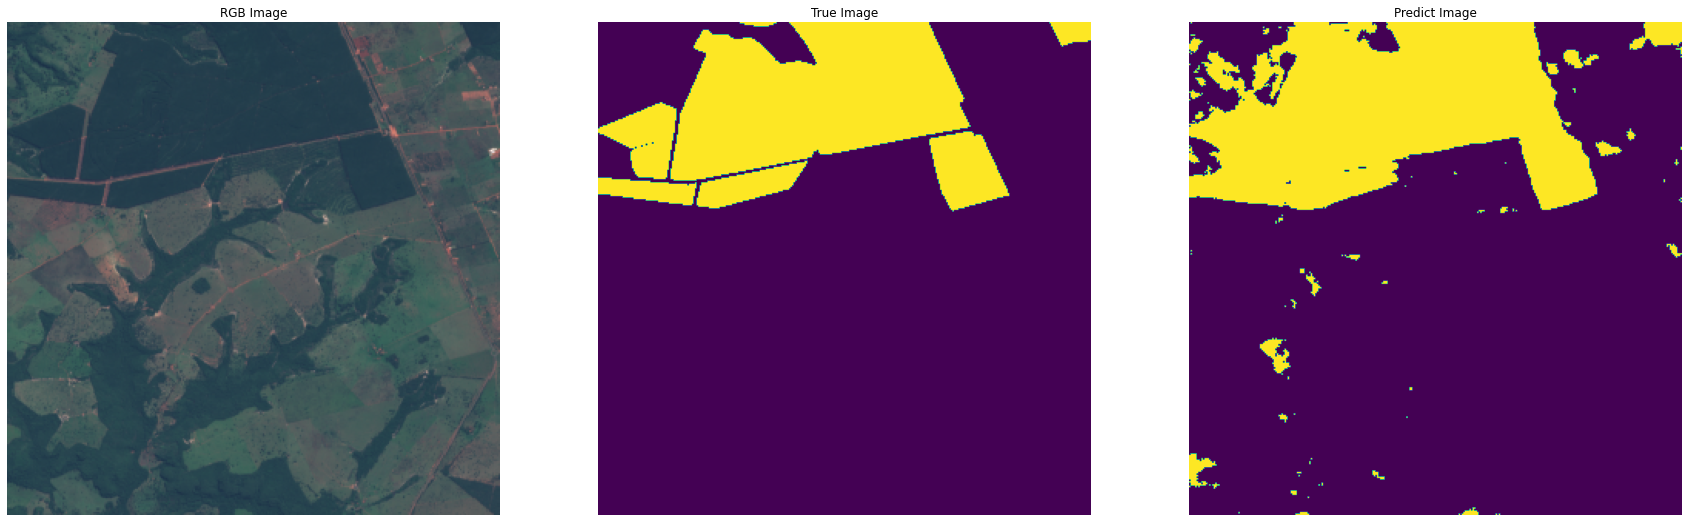

In [ ]:
i = 2
R = x_test[i,:,:,2]*4
G = x_test[i,:,:,1]*4
B = x_test[i,:,:,0]*4
rgb = np.dstack((R,G,B))
plt.figure(figsize=[30,30])
plt.subplot(131)
plt.imshow(rgb)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.round(y_test[i,:,:,0]))
plt.title('True Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.round(predict[i,:,:,0]))
plt.title('Predict Image')
plt.axis('off')

## Uso do Modelo treinado para predizer um ortomosaico completo.

Vamos agora aplicar nosso modelo de segmentação de áreas de Eucalipto nesse ortomosaico e gerar um mapeamento resultante.

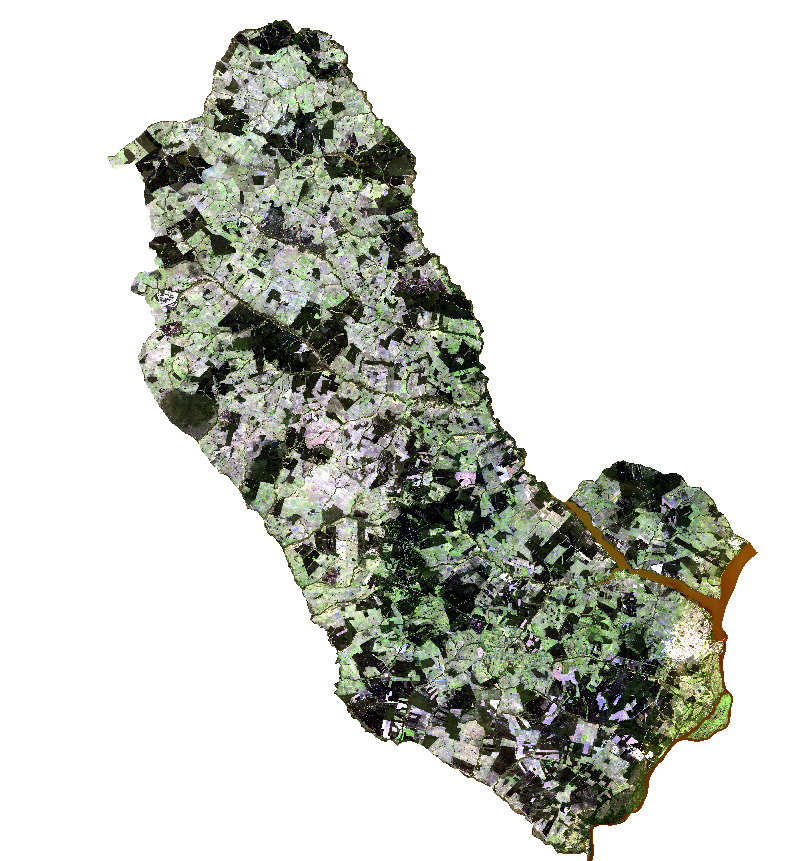

O primeiro passo é configurar o caminho do ortomosaico e criar uma pasta no content para receber aos patches e uma para as predições.

In [ ]:
path_img_to_pred = "/content/drive/MyDrive/Datasets/ForestryView/TL.tif"
path_split = "/content/split_img"
if not os.path.isdir(path_split):
    os.mkdir(path_split)

path_exp = "/content/mask_predict"
if not os.path.isdir(path_exp):
    os.mkdir(path_exp)

Dividimos nosso ortomosaico em patches de mesmo tamanho (O tamanho da imagem que treinamos o modelo):

In [ ]:
src = rasterio.open(path_img_to_pred)
out_meta = src.meta.copy()
qtd = 0
for n in range((src.meta['width']//320)):
  for m in range((src.meta['height']//320)):
    x = ((n*320))
    y = ((m*320))
    window = Window(x,y,320,320)
    win_transform = src.window_transform(window)
    arr_win = src.read(window=window)
    if (arr_win.max() != 0) and (arr_win.shape[1] == 320) and (arr_win.shape[2] == 320):
      qtd = qtd + 1
      path_exp_img = os.path.join(path_split, 'img_' + str(qtd) + '.tif')
      out_meta.update({"driver": "GTiff","height": 320,"width": 320, "compress":'lzw', "transform":win_transform})
      with rasterio.open(path_exp_img, 'w', **out_meta) as dst:
          for i, layer in enumerate(arr_win, start=1):
              dst.write_band(i, layer.reshape(-1, layer.shape[-1]))
      print('Create img: ' + str(qtd))
    del arr_win

Create img: 1
Create img: 2
Create img: 3
Create img: 4
Create img: 5
Create img: 6
Create img: 7
Create img: 8
Create img: 9
Create img: 10
Create img: 11
Create img: 12
Create img: 13
Create img: 14
Create img: 15
Create img: 16
Create img: 17
Create img: 18
Create img: 19
Create img: 20
Create img: 21
Create img: 22
Create img: 23
Create img: 24
Create img: 25
Create img: 26
Create img: 27
Create img: 28
Create img: 29
Create img: 30
Create img: 31
Create img: 32
Create img: 33
Create img: 34
Create img: 35
Create img: 36
Create img: 37
Create img: 38
Create img: 39
Create img: 40
Create img: 41
Create img: 42
Create img: 43
Create img: 44
Create img: 45
Create img: 46
Create img: 47
Create img: 48
Create img: 49
Create img: 50
Create img: 51
Create img: 52
Create img: 53
Create img: 54
Create img: 55
Create img: 56
Create img: 57
Create img: 58
Create img: 59
Create img: 60
Create img: 61
Create img: 62
Create img: 63
Create img: 64
Create img: 65
Create img: 66
Create img: 67
Crea

Criamos um laço para abrir a imagem, predizer os resultado e salvar a mascara georreferenciada.

In [ ]:
n = [f for f in os.listdir(path_split)]

In [ ]:
for path_img in n:
  img = []
  path_full = os.path.join(path_split,path_img)
  ds = rasterio.open(path_full, 'r')
  im = ds.read()
  im = im.transpose([1,2,0])
  im = im[np.newaxis,:,:,:]
  predict = loaded_model.predict(im)
  predict = np.round(predict).astype(np.uint8)
  print(path_img.split('_')[1])
  out_meta = ds.meta.copy()
  w = ds.meta['width']
  h = ds.meta['height']
  path_exp_1 = os.path.join(path_exp,'Pred_' + path_img.split('_')[1])
  out_meta.update({"driver": "GTiff","dtype":rasterio.uint8,"compress":'lzw',"count":1,"nodata":0})
  with rasterio.open(path_exp_1, 'w', **out_meta) as dst:
      dst.write(predict[0,:,:,0], indexes=1)

138.tif
362.tif
13.tif
261.tif
254.tif
116.tif
73.tif
206.tif
10.tif
282.tif
367.tif
208.tif
465.tif
295.tif
454.tif
354.tif
507.tif
46.tif
69.tif
341.tif
537.tif
493.tif
525.tif
491.tif
24.tif
438.tif
405.tif
414.tif
369.tif
33.tif
357.tif
79.tif
27.tif
286.tif
311.tif
461.tif
490.tif
277.tif
520.tif
210.tif
269.tif
124.tif
39.tif
450.tif
97.tif
542.tif
76.tif
200.tif
72.tif
293.tif
58.tif
451.tif
173.tif
186.tif
253.tif
230.tif
560.tif
370.tif
38.tif
203.tif
486.tif
250.tif
388.tif
540.tif
440.tif
285.tif
70.tif
478.tif
496.tif
403.tif
487.tif
565.tif
243.tif
397.tif
472.tif
474.tif
475.tif
95.tif
59.tif
164.tif
137.tif
401.tif
359.tif
15.tif
215.tif
265.tif
170.tif
212.tif
327.tif
133.tif
157.tif
158.tif
364.tif
136.tif
390.tif
350.tif
246.tif
23.tif
98.tif
94.tif
371.tif
387.tif
306.tif
445.tif
242.tif
488.tif
4.tif
416.tif
192.tif
153.tif
93.tif
187.tif
402.tif
122.tif
223.tif
502.tif
161.tif
177.tif
355.tif
113.tif
7.tif
100.tif
57.tif
121.tif
20.tif
3.tif
195.tif
339.tif
396.tif

Após a predição das imagens vamos mosaicar as mascaras resultantes em um unico arquivo .tif:

In [ ]:
out_fp = r"/content/Pred_mosaic.tif"

In [ ]:
images_files = [f for f in os.listdir(path_exp)]
print(images_files)

['Pred_352.tif', 'Pred_183.tif', 'Pred_96.tif', 'Pred_537.tif', 'Pred_66.tif', 'Pred_348.tif', 'Pred_109.tif', 'Pred_155.tif', 'Pred_459.tif', 'Pred_361.tif', 'Pred_509.tif', 'Pred_157.tif', 'Pred_238.tif', 'Pred_21.tif', 'Pred_2.tif', 'Pred_4.tif', 'Pred_25.tif', 'Pred_186.tif', 'Pred_260.tif', 'Pred_419.tif', 'Pred_445.tif', 'Pred_221.tif', 'Pred_126.tif', 'Pred_9.tif', 'Pred_107.tif', 'Pred_499.tif', 'Pred_268.tif', 'Pred_542.tif', 'Pred_545.tif', 'Pred_397.tif', 'Pred_209.tif', 'Pred_506.tif', 'Pred_105.tif', 'Pred_454.tif', 'Pred_404.tif', 'Pred_326.tif', 'Pred_554.tif', 'Pred_51.tif', 'Pred_169.tif', 'Pred_220.tif', 'Pred_199.tif', 'Pred_154.tif', 'Pred_497.tif', 'Pred_180.tif', 'Pred_495.tif', 'Pred_203.tif', 'Pred_346.tif', 'Pred_138.tif', 'Pred_15.tif', 'Pred_234.tif', 'Pred_541.tif', 'Pred_20.tif', 'Pred_263.tif', 'Pred_287.tif', 'Pred_153.tif', 'Pred_370.tif', 'Pred_292.tif', 'Pred_432.tif', 'Pred_391.tif', 'Pred_255.tif', 'Pred_259.tif', 'Pred_286.tif', 'Pred_437.tif', 'Pre

In [ ]:
src_files_to_mosaic = []
for fp in images_files:
  src = rasterio.open(os.path.join(path_exp,fp))
  src_files_to_mosaic.append(src)

Usamos a função merge do rasterio para unir todas as mascaras e salvamos o resultado:

In [ ]:
mosaic, out_trans = merge(src_files_to_mosaic)

In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 "compress":'lzw'})

In [ ]:
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

Colocando a mascara resultante sobre a imagem original podemos gerar um mapa de áreas de eucalipto em nossa AOI:

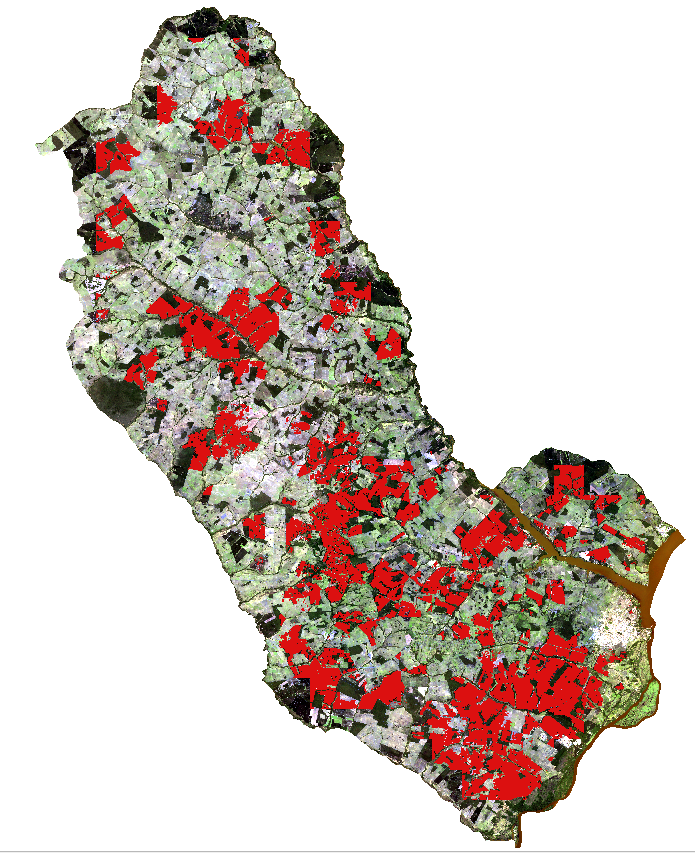